In [247]:
from copy import deepcopy
from aocd import get_data
from collections import deque
import math
import re

r="""#.#####################
#.......#########...###
#######.#########.#.###
###.....#.>.>.###.#.###
###v#####.#v#.###.#.###
###.>...#.#.#.....#...#
###v###.#.#.#########.#
###...#.#.#.......#...#
#####.#.#.#######.#.###
#.....#.#.#.......#...#
#.#####.#.#.#########v#
#.#...#...#...###...>.#
#.#.#v#######v###.###v#
#...#.>.#...>.>.#.###.#
#####v#.#.###v#.#.###.#
#.....#...#...#.#.#...#
#.#########.###.#.#.###
#...###...#...#...#.###
###.###.#.###v#####v###
#...#...#.#.>.>.#.>.###
#.###.###.#.###.#.#v###
#.....###...###...#...#
#####################.#"""

dir={'.':[(0,1),(1,0),(0,-1),(-1,0)],'v':[(1,0)],'>':[(0,1)]}

#r=get_data(day=23, year=2023)
inp=r.split('\n')
G=[[c for c in r] for r in inp]
G
R=len(G)
C=len(G[0])

kruis={}
def printg(G,v):
    for r in range(R):
        s=""
        for c in range(C):
            ch=G[r][c]
            if ch in "#":# and (r,c) not in v:
                s+=" %s "%ch
            else:
                if (r,c) in kruis:
                    s+=" %s "%['','','*','+'][kruis[(r,c)]]
                if ch in 'v>':
                    s+="%s%02d"%(ch,v[(r,c)])
                else:
                    s+=" %02d"%v[(r,c)]
        print(s)
#printg(G)   
kruis=[(0,1),(R-1,C-2)]
def kruispunt():
    global kruis
    for r in range(R):
        for c in range(C):
            ch=G[r][c]
            if ch=='.':
                cnt=0
                for d in dir['.']:
                    nr,nc=r+d[0],c+d[1]
                    if good(nr,nc):
                        if G[nr][nc]!='#':
                            cnt+=1
                #print(r,c,cnt)
                if cnt>=3:
                    kruis.append((r,c))

kruispunt()

def good(r,c):
    return 0<=r<R and 0<=c<C

sr,sc=(0,1)
V={(sr,sc):0}
q=deque([(sr,sc,0)])
kr={}
K={kr:{} for kr in kruis}

for kr,kc in kruis:
    q=deque([(kr,kc,0)])
    V={(kr,kc)}
    while q:
        r, c, dist = q.popleft()

        if dist!=0 and (r,c) in kruis:
            K[(kr,kc)][(r,c)]=dist
            continue
        ch = G[r][c]
        for d in dir[ch]:
            rn,cn=(r+d[0],c+d[1])
            if (rn,cn) not in V and good(rn,cn) and (G[rn][cn] != '#'):
                q.append((rn,cn,dist+1))
                V.add((rn,cn))

V=set()

def dfs(r,c):
    #print(r,c)
    if (r,c) == (R-1,C-2):
        return 0

    m = -float("inf")

    V.add((r,c))
    for nr,nc in K[(r,c)]:
        if (nr,nc) not in V:
            m = max(m, dfs(nr,nc) + K[(r,c)][(nr,nc)])
    V.remove((r,c))

    return m





dfs(0,1)

94

529

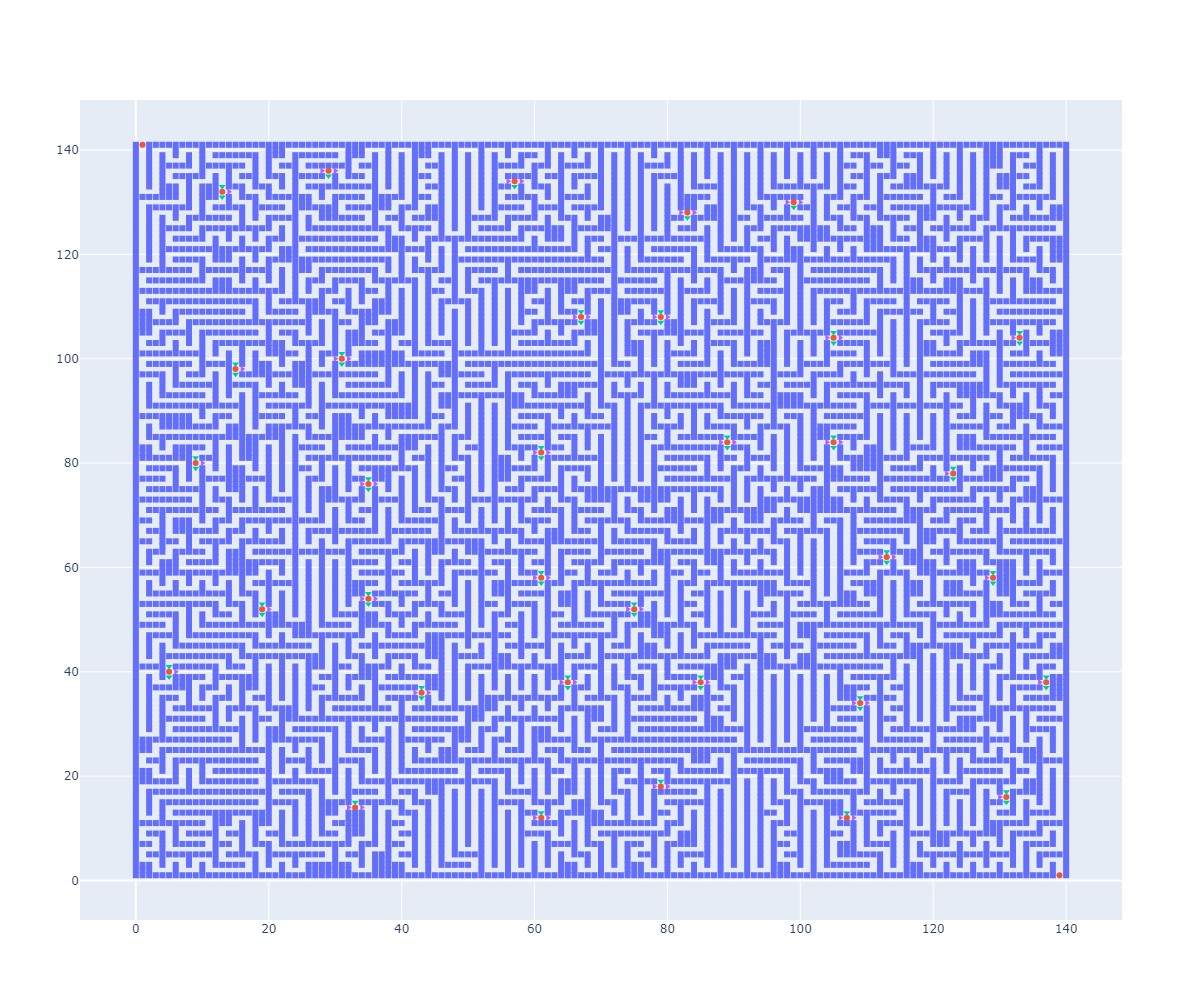

In [226]:

G=[[c for c in r] for r in inp]
G
R=len(G)
C=len(G[0])
wx=[]
wy=[]
kx=[]
ky=[]
dx=[]
dy=[]
rx=[]
ry=[]
for r in range(R):
    for c in range(C):
        ch=G[r][c]
        rr=R-r
        if ch=='#':
            wx.append(c)
            wy.append(rr)
        if ch=='>':
            rx.append(c)
            ry.append(rr)
        if ch=='v':
            dx.append(c)
            dy.append(rr)
        if (r,c) in kruis:
            kx.append(c)
            ky.append(rr)    

#wx=wx[::-1]
#wy=wy[::-1]
#kx=kx[::-1]
#ky=ky[::-1]
#dx=dx[::-1]
#dy=dy[::-1]
#rx=rx[::-1]
#ry=ry[::-1]

import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=wx, y=wy,
                    mode='markers',
                    name='markers',marker_symbol='square'))
fig.add_trace(go.Scatter(x=kx, y=ky,
                   mode='markers'))
fig.add_trace(go.Scatter(x=dx, y=dy,
                   mode='markers',marker_symbol='triangle-down'))
fig.add_trace(go.Scatter(x=rx, y=ry,
                   mode='markers',marker_symbol='triangle-right'))
fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
    showlegend=False
    )
fig.show()

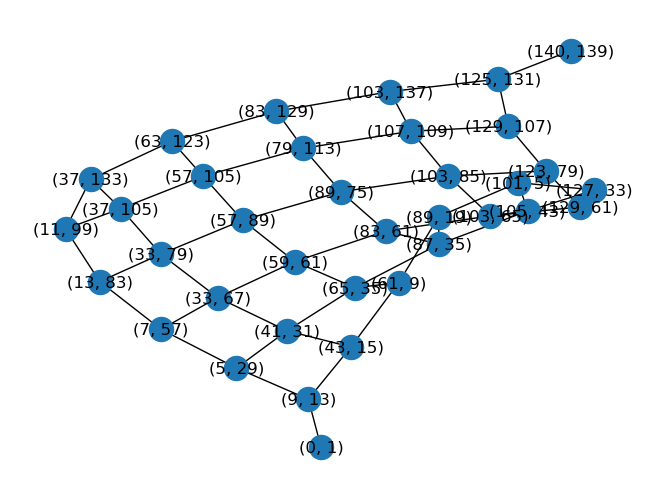

In [208]:
import networkx as nx
GG = nx.Graph()
for r,c in K:
    GG.add_node((r,c))
for r,c in K:
    for nr,nc in K[r,c]:
        GG.add_edge((r,c),(nr,nc))
nx.draw(GG,with_labels = True)
#labels = nx.draw_networkx_labels(GG, pos={k:np.array(list(k)) for k in K})

In [267]:
bestP+[(R-1,C-2)]

[(0, 1),
 (9, 13),
 (43, 15),
 (61, 9),
 (89, 19),
 (101, 5),
 (127, 33),
 (129, 61),
 (103, 65),
 (83, 61),
 (87, 35),
 (65, 35),
 (59, 61),
 (33, 67),
 (41, 31),
 (5, 29),
 (7, 57),
 (13, 83),
 (33, 79),
 (57, 89),
 (89, 75),
 (79, 113),
 (57, 105),
 (37, 105),
 (11, 99),
 (37, 133),
 (63, 123),
 (83, 129),
 (103, 137),
 (107, 109),
 (103, 85),
 (123, 79),
 (129, 107),
 (125, 131),
 (140, 139)]

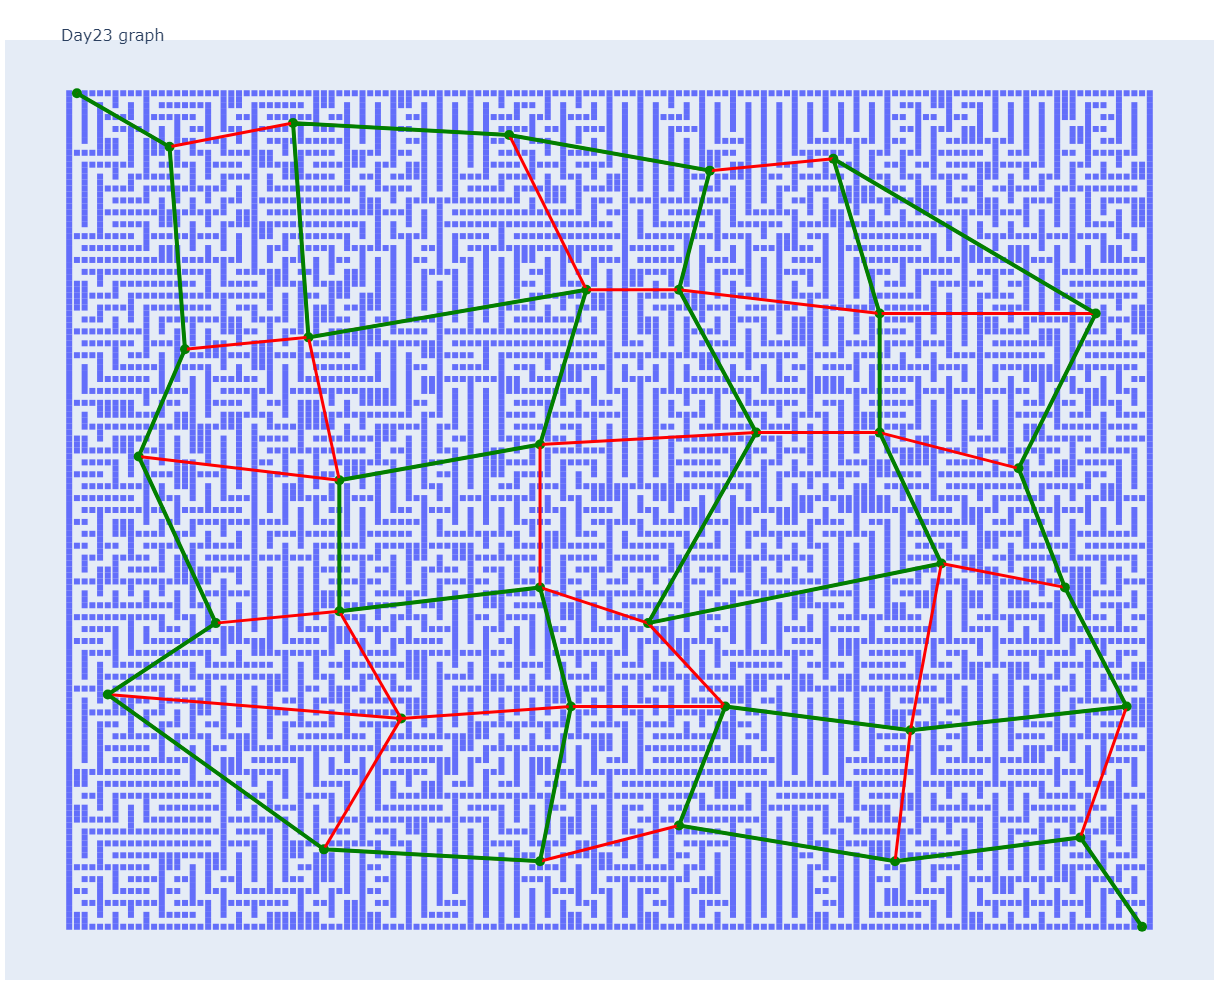

3675797

In [268]:
px=[]
py=[]
for  p in bestP+[(R-1,C-2)]:
    px.append(R-p[0])
    py.append(p[1])
    
edge_x = []
edge_y = []
for edge in GG.edges():
    #print(edge)
    x0, y0 = edge[0]
    x1, y1 = edge[1]
    edge_x.append(R-x0)
    edge_x.append(R-x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    y=edge_x, x=edge_y,
    line=dict(width=3, color='red'),
    hoverinfo='none',
    mode='lines')

bestpad_trace = go.Scatter(
    y=px, x=py,
    line=dict(width=4, color='green'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in GG.nodes():
    x,y = node
    node_x.append(y)
    node_y.append(x)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=5,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))



node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(GG.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text
fig = go.Figure()
doolhof=go.Scatter(x=wx, y=wy,
                    mode='markers',
                    name='markers',marker_symbol='square')
kruisingen=go.Scatter(x=kx, y=ky,
                   mode='markers',marker=dict(
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color='green',
        size=10))



fig = go.Figure(data=[doolhof,kruisingen,edge_trace,bestpad_trace],#, node_trace],
             layout=go.Layout(
                title='<br>Day23 graph',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                # annotations=[ dict(
                #     text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                #     showarrow=False,
                #     xref="paper", yref="paper",
                #     x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
    showlegend=False
    )
fig.show()
h=fig.to_html('long_walk.html')
open('long_walk.html','w').write(h)

In [260]:
from copy import deepcopy
from aocd import get_data
from collections import deque
import math
import re

r="""#.#####################
#.......#########...###
#######.#########.#.###
###.....#.>.>.###.#.###
###v#####.#v#.###.#.###
###.>...#.#.#.....#...#
###v###.#.#.#########.#
###...#.#.#.......#...#
#####.#.#.#######.#.###
#.....#.#.#.......#...#
#.#####.#.#.#########v#
#.#...#...#...###...>.#
#.#.#v#######v###.###v#
#...#.>.#...>.>.#.###.#
#####v#.#.###v#.#.###.#
#.....#...#...#.#.#...#
#.#########.###.#.#.###
#...###...#...#...#.###
###.###.#.###v#####v###
#...#...#.#.>.>.#.>.###
#.###.###.#.###.#.#v###
#.....###...###...#...#
#####################.#"""

dir={'.':[(0,1),(1,0),(0,-1),(-1,0)],'v':[(1,0)],'>':[(0,1)]}

r=get_data(day=23, year=2023)
inp=r.split('\n')
G=[[c for c in r] for r in inp]
G
R=len(G)
C=len(G[0])

kruis={}
def printg(G,v):
    for r in range(R):
        s=""
        for c in range(C):
            ch=G[r][c]
            if ch in "#":# and (r,c) not in v:
                s+=" %s "%ch
            else:
                if (r,c) in kruis:
                    s+=" %s "%['','','*','+'][kruis[(r,c)]]
                if ch in 'v>':
                    s+="%s%02d"%(ch,v[(r,c)])
                else:
                    s+=" %02d"%v[(r,c)]
        print(s)
#printg(G)   
kruis=[(0,1),(R-1,C-2)]
def kruispunt():
    global kruis
    for r in range(R):
        for c in range(C):
            ch=G[r][c]
            if ch=='.':
                cnt=0
                for d in dir['.']:
                    nr,nc=r+d[0],c+d[1]
                    if good(nr,nc):
                        if G[nr][nc]!='#':
                            cnt+=1
                #print(r,c,cnt)
                if cnt>=3:
                    kruis.append((r,c))

kruispunt()

def good(r,c):
    return 0<=r<R and 0<=c<C

sr,sc=(0,1)
V={(sr,sc):0}
q=deque([(sr,sc,0)])
kr={}
K={kr:{} for kr in kruis}

for kr,kc in kruis:
    q=deque([(kr,kc,0)])
    V={(kr,kc)}
    while q:
        r, c, dist = q.popleft()

        if dist!=0 and (r,c) in kruis:
            K[(kr,kc)][(r,c)]=dist
            continue
        ch = G[r][c]
        for d in dir['.']:
            rn,cn=(r+d[0],c+d[1])
            if (rn,cn) not in V and good(rn,cn) and (G[rn][cn] != '#'):
                q.append((rn,cn,dist+1))
                V.add((rn,cn))

V=set()
P=[]
bestP=[]
m=0
bestm=0
def dfs(r,c):
    global m,bestm,bestP,P
    #print(r,c)
    if (r,c) == (R-1,C-2):
        if m>bestm:
            bestm=m
            bestP=deepcopy(P)
        return 
    V.add((r,c))
    P.append((r,c))
    for nr,nc in K[(r,c)]:
        if (nr,nc) not in V:
            m+= K[(r,c)][(nr,nc)]
            dfs(nr,nc)
            m-=K[(r,c)][(nr,nc)]
            #m = max(m, dfs(nr,nc) + K[(r,c)][(nr,nc)])
    V.remove((r,c))
    P.pop()
m


dfs(0,1)

In [262]:
bestm,bestP

(6538,
 [(0, 1),
  (9, 13),
  (43, 15),
  (61, 9),
  (89, 19),
  (101, 5),
  (127, 33),
  (129, 61),
  (103, 65),
  (83, 61),
  (87, 35),
  (65, 35),
  (59, 61),
  (33, 67),
  (41, 31),
  (5, 29),
  (7, 57),
  (13, 83),
  (33, 79),
  (57, 89),
  (89, 75),
  (79, 113),
  (57, 105),
  (37, 105),
  (11, 99),
  (37, 133),
  (63, 123),
  (83, 129),
  (103, 137),
  (107, 109),
  (103, 85),
  (123, 79),
  (129, 107),
  (125, 131)])

In [39]:
for r in range(R):
    for c in range(C):
        ch=G[r][c]
        if ch=='>':
            if (r,c-1) in V and (r,c+1) in V:
                if V[(r,c-1)] > V[(r,c+1)]:
                    G[r][c]='#'
        elif ch=="v":
            if (r-1,c) in V and (r+1,c) in V:
                if V[(r-1,c)] > V[(r+1,c)]:
                    G[r][c]='#'
printg(G,V)
                    

 #  00 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
 #  01 02 03 04 05 06 07 #  #  #  #  #  #  #  #  #  49 50 51 #  #  # 
 #  #  #  #  #  #  #  08 #  #  #  #  #  #  #  #  #  48 #  52 #  #  # 
 #  #  #  13 12 11 10 09 #  35>36 37>38 39 #  #  #  47 #  53 #  #  # 
 #  #  # v14 #  #  #  #  #  34 # v38 #  40 #  #  #  46 #  54 #  #  # 
 #  #  #  15>16 17 18 19 #  33 #  39 #  41 42 43 44 45 #  55 56 57 # 
 #  #  # v16 #  #  #  20 #  32 #  40 #  #  #  #  #  #  #  #  #  58 # 
 #  #  #  17 18 19 #  21 #  31 #  41 42 43 44 45 46 47 #  61 60 59 # 
 #  #  #  #  #  20 #  22 #  30 #  #  #  #  #  #  #  48 #  62 #  #  # 
 #  25 24 23 22 21 #  23 #  29 #  55 54 53 52 51 50 49 #  63 64 65 # 
 #  26 #  #  #  #  #  24 #  28 #  54 #  #  #  #  #  #  #  #  # v66 # 
 #  27 #  33 34 35 #  25 26 27 #  53 52 51 #  #  #  63 64 65>66 67 # 
 #  28 #  32 # v36 #  #  #  #  #  #  #  #  #  #  #  62 #  #  # v68 # 
 #  29 30 31 #  37>38 39 #  45 46 47>48 49>50 51 #  61 #  #  #  69 # 
 #  #  #  #  # v38 #

In [21]:
(0,1)  in visited

False